## Studying *Drosophila* egg-laying behavior using automated image analysis with Python (FlyScan-Course)

---
### Introduction

The goal of this course is to set up an automated procedure in Python to study the egg-laying behavior of *Drosophila*.  
In the working directory you will find the "*fly_images*" folder which contains all images that will be analysed during the course.  
The images show flies confined in a chamber with two egg-laying areas coated with different substrates (see picture below).   

**Our task will be to automatically track flies within the chamber and determine if they preferentially stay in one of the egg-laying areas.**

<img src="stock_images\fly_chamber_diagram.jpg" width=480 height=300 />

---
### 1) Manage paths

Here we will use [pathlib](https://docs.python.org/3/library/pathlib.html) library to simplify path management and avoid incompatibility between operating systems.  

**1.1)** Import `Path` module from `pathlib` library and check the path to the current directory using `Path.cwd()`:

In [1]:
from pathlib import Path
print(Path.cwd())

C:\Datas\3-GitHub_BDehapiot\Python_ImageProcessing_2022


This command should output the complete path to the downloaded directory.  
Otherwise, the notebook was probably started from the wrong directory   

**1.2)** Create a new path toward the "*fly_images*" folder contained in the downloaded directory: 

In [2]:
im_path = Path('fly_images')

Using this syntax, pathlib create a path object (or class) that can eventually be assigned to a variable (e.g. "*im_path*")  
You can retrieve the full path toward "*fly_images*" folder by using the `resolve()` method:

In [3]:
print(im_path) # relative path
print(im_path.resolve()) # full path
print(Path('fly_images').resolve()) # full path

fly_images
C:\Datas\3-GitHub_BDehapiot\Python_ImageProcessing_2022\fly_images
C:\Datas\3-GitHub_BDehapiot\Python_ImageProcessing_2022\fly_images


**1.3)** Use the `iterdir()` method to extract the paths of images contained in the "*fly_images*" folder: 

In [4]:
im_paths = [] # create an empty list
for path in Path('fly_images').iterdir():
    im_paths.append(path)

Print path info for the first image:

In [5]:
print(im_paths[0]) # relative path 
print(im_paths[0].resolve()) # full path

fly_images\21-01-06_Pi04_MidLight_000.tif
C:\Datas\3-GitHub_BDehapiot\Python_ImageProcessing_2022\fly_images\21-01-06_Pi04_MidLight_000.tif


Note that you can use attributes of the path object to retrieve informations about your image: 

In [6]:
print(im_paths[0].name) # name
print(im_paths[0].stem) # name without extension
print(im_paths[0].suffix) # extension only

21-01-06_Pi04_MidLight_000.tif
21-01-06_Pi04_MidLight_000
.tif


---
### 2) Import images 

**2.1)** Now that our image paths have been stored in "*im_paths*" , import the first image using the `io.imread` function from [skimage](https://scikit-image.org/) library:

In [7]:
from skimage import io
im_first = io.imread(im_paths[0])

This command import the first image as a numpy array, which is a handy format to manipulate images in Python.    
Check "im_first" type using the `type` function:

In [8]:
print(type(im_first))

<class 'numpy.ndarray'>


**2.2)** Determine height and width of "*im_first*" using the `shape` attribute:

In [9]:
print(im_first.shape) # 2 elements tuple
im_height = im_first.shape[0]
im_width = im_first.shape[1]

(480, 640)


**2.3)** Count the total number of images using the `len` function on "image_paths":  

In [10]:
im_count = len(im_paths)
print(im_count)

200


### <span style="color:SteelBlue"> Exercice 1

In this exercice you will import all images contained in "*fly_images*" folder as a 3D numpy array named "*im_all*".  
- Hint: create a zero array with the `np.zeros` function and fill it with imported images.

In [11]:
import numpy as np

In [12]:
# 1) create a zero array with shape (im_count, im_height, im_width)
# 2) fill this array with imported images

In [13]:
# correction

im_all = np.zeros([im_count, im_height, im_width], dtype='uint8')

for i, path in enumerate(im_paths):   
    im_all[i,...] = io.imread(path)  

You can visualize the 3D array as a time series in napari: 

In [14]:
import napari
viewer = napari.view_image(im_all)

---
### 3) Segment flies

In this section, we will design a series of operations to automatically segment flies from the static background.  
To do this, we will process images using the [numpy](https://numpy.org/doc/stable/user/index.html) and [skimage](https://scikit-image.org/) libraries and display the results using [matplotlib](https://matplotlib.org/stable/plot_types/index#).   
Here is an example to get started:

**3.1)** Compute the min and the max projection (over images) of "*im_all*" and display the results with matplotlib: 

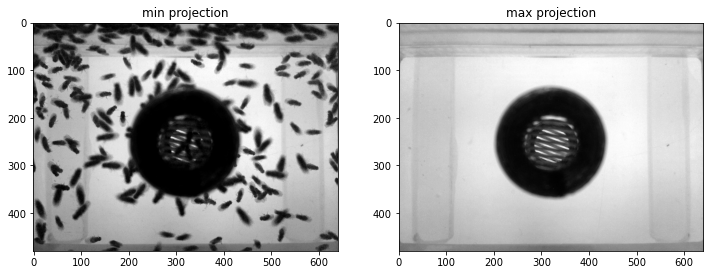

In [15]:
import matplotlib.pyplot as plt

# compute min and max projections
im_all_min = np.min(im_all, axis=0)
im_all_max = np.max(im_all, axis=0)

# display results with matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
ax[0].imshow(im_all_min, cmap='gray')
ax[0].set_title('min projection')
ax[1].imshow(im_all_max, cmap='gray')
ax[1].set_title('max projection')
plt.show()


### <span style="color:SteelBlue"> Exercice 2

In this exercice you will compute the median projection of "*im_all*" and subtract it to "*im_all*" itself.  
You will then display the result for the first image using matplotlib.  
- Hint #1: use `np.median` and `np.subtract` functions.  
- Hint #2: do not modify the "*im_all*" variable as we will use it later.

In [16]:
# 1) compute median projection (im_all_median)
# 2) subtract median projection from raw images (im_all_sub)
# 3) display result for the first image in matplotlib

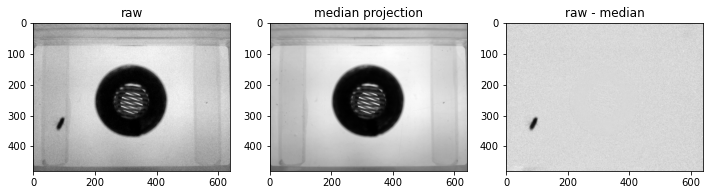

In [17]:
# Correction

# compute median projection
im_all_median = np.median(im_all, axis=0)

# subtract median projection from raw images
im_all_sub = np.subtract(im_all, im_all_median)

# display result for the first image in matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
ax[0].imshow(im_all[0], cmap='gray')
ax[0].set_title('raw')
ax[1].imshow(im_all_median, cmap='gray')
ax[1].set_title('median projection')
ax[2].imshow(im_all_sub[0], cmap='gray')
ax[2].set_title('raw - median')
plt.show()

For convenience, invert "*im_all_sub*" to make fly pixels brighter than the backgorund. 

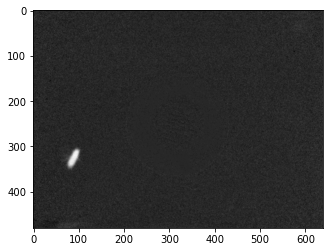

In [18]:
from skimage.util import invert

im_all_sub = invert(im_all_sub)
plt.imshow(im_all_sub[0], cmap='gray')
plt.show()

The next step will consists of separating pixels belonging to flies from those belonging to the background.  
Here, we will first apply a threshold, based on pixel intensity, to "*im_all_sub*". 

**3.2)** Determine a threshold value using the `threshold_yen` function and use it to create a binary mask:

19.89453125


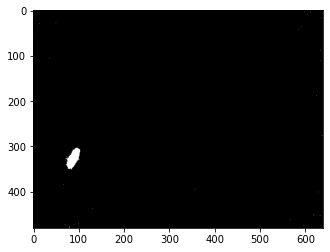

In [19]:
from skimage.filters import threshold_yen

thresh = threshold_yen(im_all_sub[0])
im_all_mask = im_all_sub > thresh
print(thresh)

plt.imshow(im_all_mask[0], cmap='gray')
plt.show()

Let's have a closer look:

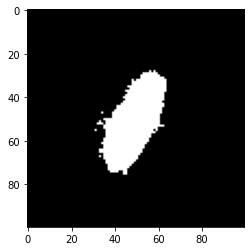

In [20]:
plt.imshow(im_all_mask[0,275:375,40:140], cmap='gray')
plt.show()

Although the result seems satisfying, a closer look reveals some rough edges and isolated pixels.  
Some more processing will be required to avoid such problems.

**3.3)** Apply a Gaussian blur on "*im_all_sub*" using the `gaussian` function before thresholding, then remove small binary objects with `remove_small_objects`. 

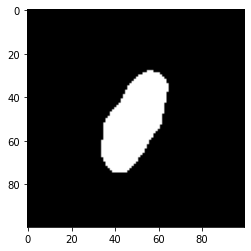

In [21]:
from skimage.filters import gaussian
from skimage.morphology import remove_small_objects

im_all_mask = gaussian(im_all_sub, 2, channel_axis=0) > thresh
im_all_mask = remove_small_objects(im_all_mask, min_size=50)

plt.imshow(im_all_mask[0,275:375,40:140], cmap='gray')
plt.show()

Another problem is that some segmented objects touch image boundaries:

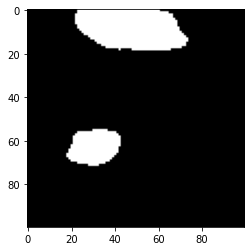

In [22]:
plt.imshow(im_all_mask[12,0:100,20:120], cmap='gray')
plt.show()

**3.4)** Remove binary objects that touch image borders using the `clear_border` function:

In [23]:
from skimage.segmentation import clear_border

im_all_mask = clear_border(im_all_mask)

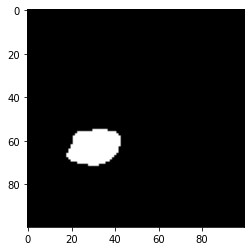

In [24]:
plt.imshow(im_all_mask[12,0:100,20:120], cmap='gray')
plt.show()

Now that we are satisfy with our mask we can display the segmentation results in napari. 

**3.5)** Generate binary object outlines and overlay them to "*im_all_sub*":

In [25]:
from skimage.morphology import dilation

im_all_mask_display = np.zeros_like(im_all)

for i, mask in enumerate(im_all_mask):    
    outlines = dilation(mask) ^ mask
    outlines = outlines.astype('uint8')*255 
    im_all_mask_display[i,...] = np.maximum(im_all[i,...], outlines)

In [26]:
viewer = napari.view_image(im_all_mask_display)

### <span style="color:SteelBlue"> Exercice 3

In this exercise, you will encapsulate all segmentation steps we have done so far in two separate functions.  

1 - The first function, `im_segment`, that will output a binary mask from raw images (see steps 3.1 to 3.4):

with the following arguments:  
- a time series we want to process ("*im_all*")
- a threshold coefficient to adjust the threshold retrieved using the yen method
- a sigma value to set the strength of the gaussian blur
- a minimum size in pixels to discard small binary objects

and the following output:  
- a mask as "*im_all_mask*"  

2 - The second function, `im_display`, will output a display from a binary mask (see step 3.5):  

with the following argument:  
- a mask we want to display ("*im_all_mask*")

and the following output:
- a display as "*im_all_display*"

In [27]:
def im_segment(im_all, thresh_coeff=1.0, gaussian_sigma=2.0, min_size=50):
        
    # 1) subtract static background
    # 2) get binary mask
    
    ...
    
    return im_all_mask

In [28]:
def im_display(im_all_mask):
        
    # 1) make a display
    
    ...
    
    return im_all_display

In [29]:
# Correction

def im_segment(im_all, thresh_coeff=1.0, gaussian_sigma=2.0, min_size=50):
    
    # subtract static background
    im_all_median = np.median(im_all, axis=0)
    im_all_sub = np.subtract(im_all, im_all_median)
    im_all_sub = invert(im_all_sub)

    # get binary mask
    im_all_mask = gaussian(im_all_sub, 2, channel_axis=0) > thresh*thresh_coeff
    im_all_mask = remove_small_objects(im_all_mask, min_size=50)
    im_all_mask = clear_border(im_all_mask)
        
    return im_all_mask

In [30]:
# Correction

def im_display(im_all_mask):
    
    # make a display
    
    im_all_mask_display = np.zeros_like(im_all)
    
    for i, mask in enumerate(im_all_mask): 
        outlines = dilation(mask) ^ mask
        outlines = outlines.astype('uint8')*255 
        im_all_mask_display[i,...] = np.maximum(im_all[i,...], outlines)
    
    return im_all_mask_display      

Once the function is defined, you can modify parameters and display the results with napari:

In [31]:
im_all_mask = im_segment(im_all, thresh_coeff=1.0, gaussian_sigma=2.0, min_size=50)
im_all_mask_display = im_display(im_all_mask)

viewer = napari.view_image(im_all_mask_display)

---
### 4) Filter binary objects

In this section, we will inspect individual binary objects and determine if segmented flies are standing in one or the other egg-laying areas.  
We will of course monitor fly positions according to egg-laying areas, but we will also take into account that some flies may be walking on the ceiling instead of standing at the bottom of the chamber.

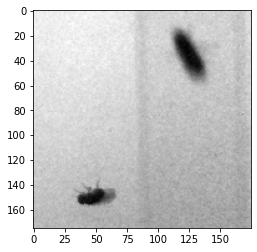

In [32]:
plt.imshow(im_all[10,260:435,440:615], cmap='gray')
plt.show()

Here, the right fly is for example walking on the ceiling while the left one is standing in the bottom of the chamber.  
Note that being out of focus, the ceiling fly looks bigger than the other one.

**4.1)** Import and display the binary mask of the egg-laying areas:

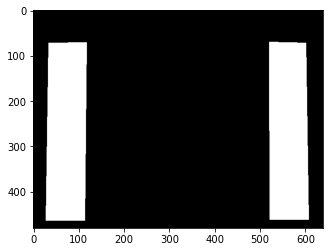

In [33]:
egglay_mask = io.imread(Path('stock_images', 'DUP(HistMatch)_21-01-06_Pi04_Chamber-Mask.tif'))
                         
plt.imshow(egglay_mask, cmap='gray')
plt.show()

**4.2)** Attribute unique IDs to "*im_all_mask*" binary objects using the `label` function:

In [34]:
from skimage.morphology import label

im_all_labels = np.zeros_like(im_all)

max_id = 0 # initialize max_id
for i, mask in enumerate(im_all_mask):  
    
    labels = label(mask)   
    labels[labels != 0] += max_id
    im_all_labels[i,...] = labels
    
    if np.max(labels) != 0:
        max_id = np.max(labels) # update max_id

Note that the max_id counter is necessary to get unique id for all binary objects.  
Indeed, as it is implemented for now, the skimage label function reinitializes labels for each image in our time series. 

You can inspect attributed ID by importing "*im_all_labels*" as a label layer in napari:

In [35]:
viewer = napari.view_labels(im_all_labels) # view_labels instead of view_image

**4.3)** Extract labeled object properties using the `regionprops` function:

In [36]:
from skimage.measure import regionprops

im_all_props = []

# repeat the egglay_mask to match im_all_labels dimensions
egglay_mask_tiled = np.tile(egglay_mask, (im_count, 1, 1)) 

for props in regionprops(im_all_labels, egglay_mask_tiled):   
    
    temp_props = {       
        'area': props['area'],
        'coords': props['coords'],
        'int_mean': props['intensity_mean']
        }
    
    im_all_props.append(temp_props)    

The "*egglay_mask_tiled*" is used as the second argument of the `regionprops` function.  
This means that "*egglay_mask_tiled*" is the intensity image on which the 'intensity_mean' will be measured (see [regionprops](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) for more information).

**4.4)** Extract labeled object areas and plot the area distribution using the `plt.hist` function:

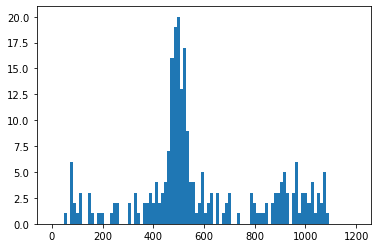

In [37]:
areas = [props['area'] for props in im_all_props] # list comprehension to extract areas

plt.hist(areas, bins=100, range=(0, 1200))
plt.show()

As you can see, a main peak emerges around 500 pixels area.  
This corresponds to the typical area of flies lying at the bottom of the chamber.  

### <span style="color:SteelBlue"> Exercice 4

In this last exercise, you will isolate "valid flies" standing, at the bottom of the chamber, in either of the egg-laying areas.  
To do that, you will first extract the y and x coordinate of valid fly centroids and store them as a tuple in the *"coords_filt"* list.   
You will then create *"im_all_mask_filt"* which will contain only the binary objects of the valid flies.
- Hint #1: use conditional statements.  
- Hint #2: centroids can be extracted from coordinates using `np.mean` function.  
- Hint #3: centroids must be integer, use `int` function.  

In [38]:
coords_filt = [] # list in which you will store y and x centroids as a tuple
im_all_mask_filt = np.zeros_like(im_all_mask) # empty mask in which you will add binary object corresponding to valid flies

for props in im_all_props:
    
    # extract coords
    coords_t = props['coords'][:,0]
    coords_y = props['coords'][:,1]
    coords_x = props['coords'][:,2]
        
    # 1) extract "valid fly" centroids   
    
    # 2) add "valid fly" binary objects
     
    ...

In [39]:
# Correction

centroid_filt = [] # list in which you will store y and x centroids as a tuple
im_all_mask_filt = np.zeros_like(im_all_mask) # empty mask in which you will add binary object corresponding to valid flies

for props in im_all_props:
       
    # extract coords
    coords_t = props['coords'][:,0]
    coords_y = props['coords'][:,1]
    coords_x = props['coords'][:,2]

    if props['area'] < 800 and props['int_mean'] > 0.25:
        
        # extract centroids
        centroid_y = int(np.mean(coords_y))
        centroid_x = int(np.mean(coords_x))        
        centroid_filt.append((centroid_y, centroid_x))   
        
        # add valid fly binary objects
        im_all_mask_filt[coords_t, coords_y, coords_x] = 1 
          

Visualize valid fly centroids using a point layer overlayed to "*im_all_median*" in napari:

In [40]:
viewer = napari.view_image(im_all_median)
viewer.add_points(np.array(centroid_filt), size=10)

C:\Users\bdeha\Anaconda3\envs\Python-ImageProcessing_2022\lib\site-packages\numpy\core\numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


<Points layer 'Points' at 0x1fe091229d0>

Create a display for "*im_all_mask_filt*" and show the result in napari:

In [41]:
im_all_mask_filt_display = im_display(im_all_mask_filt)
viewer = napari.view_image(im_all_mask_filt_display)